# Could it be that the fringe amplitude changes as a function of source radiance?
Let us quickly check if such a conjecture holds.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
# import modules
import funcs
import mrsobs

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

We load the images for one band of the MRS for different kinds of sources, including: 
* MTS 800K BB extended source
* MTS 600K BB extended source
* MTS 400K BB extended source
  
Additionally the pixel-to-wavelength calibration map and the pixel-to-along-slice position map are imported.

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get data
band = '1A'
ext_800Ksource_sci,ext_800Ksource_bkg = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')
ext_600Ksource_sci,ext_600Ksource_bkg = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='600K')
ext_400Ksource_sci,ext_400Ksource_bkg = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='400K')

# Get wavelength calibration pixel map
d2cMaps   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
lambdaMap = d2cMaps['lambdaMap']
nslices   = d2cMaps['nslices']

We subtract background exposures where available.

In [3]:
# perform transform
ext_800Ksource_bkgsubtr = ext_800Ksource_sci-ext_800Ksource_bkg
ext_600Ksource_bkgsubtr = ext_600Ksource_sci-ext_600Ksource_bkg
ext_400Ksource_bkgsubtr = ext_400Ksource_sci-ext_400Ksource_bkg

We perform an even-odd row signal correction to the data (caused by the read-out pattern of MIRI detector pixel rows).

In [4]:
ext_800Ksource_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_800Ksource_bkgsubtr)
ext_600Ksource_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_600Ksource_bkgsubtr)
ext_400Ksource_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_400Ksource_bkgsubtr)

We normalize the spectra of the three "blackbodies" on the basis of their fringe peaks and we compare the fringe transmissions.

In [5]:
# pixel trace
ypos,xpos   = funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)

# signal normalization based on fringe profile
sel = (lambdaMap[ypos,xpos]!=0)
ext_800Ksource_norm = funcs.norm_fringe(ext_800Ksource_oddevencorr[ypos,xpos][sel],thres=0.,min_dist=6,k=3,ext=3)
ext_600Ksource_norm = funcs.norm_fringe(ext_600Ksource_oddevencorr[ypos,xpos][sel],thres=0.,min_dist=6,k=3,ext=3)
ext_400Ksource_norm = funcs.norm_fringe(ext_400Ksource_oddevencorr[ypos,xpos][sel],thres=0.,min_dist=4,k=3,ext=3)

<IPython.core.display.Javascript object>


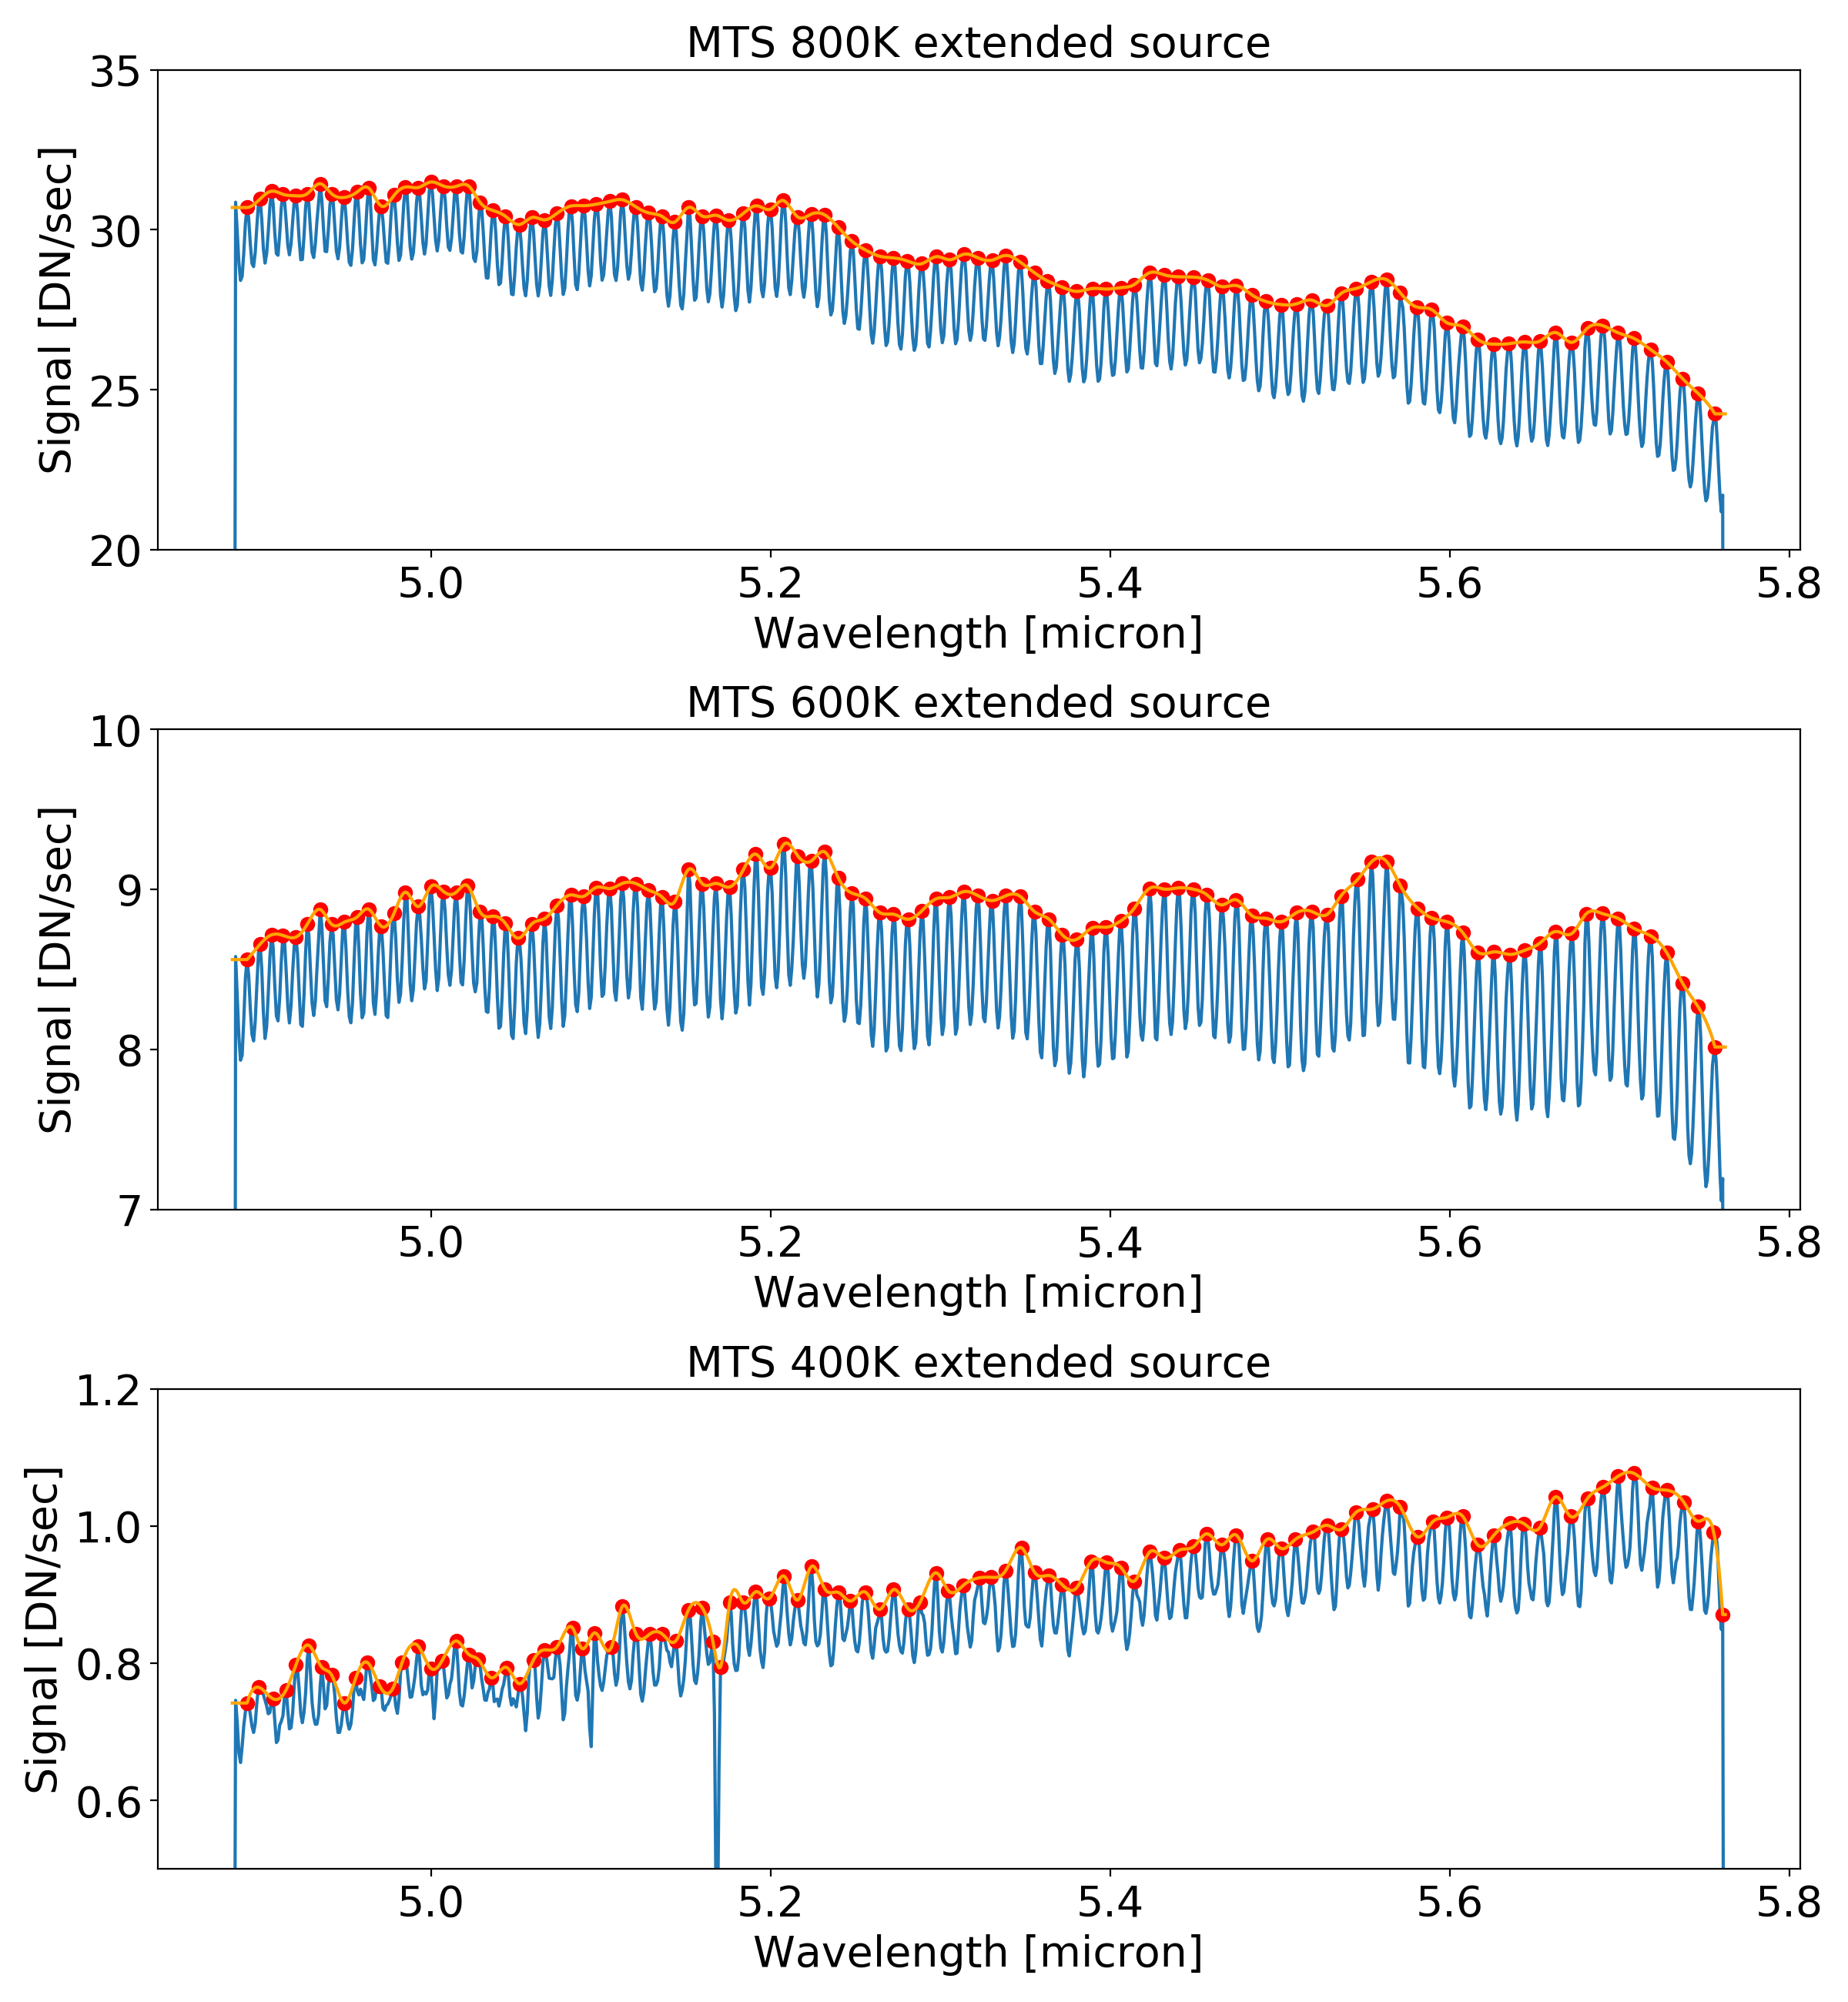

<IPython.core.display.Javascript object>


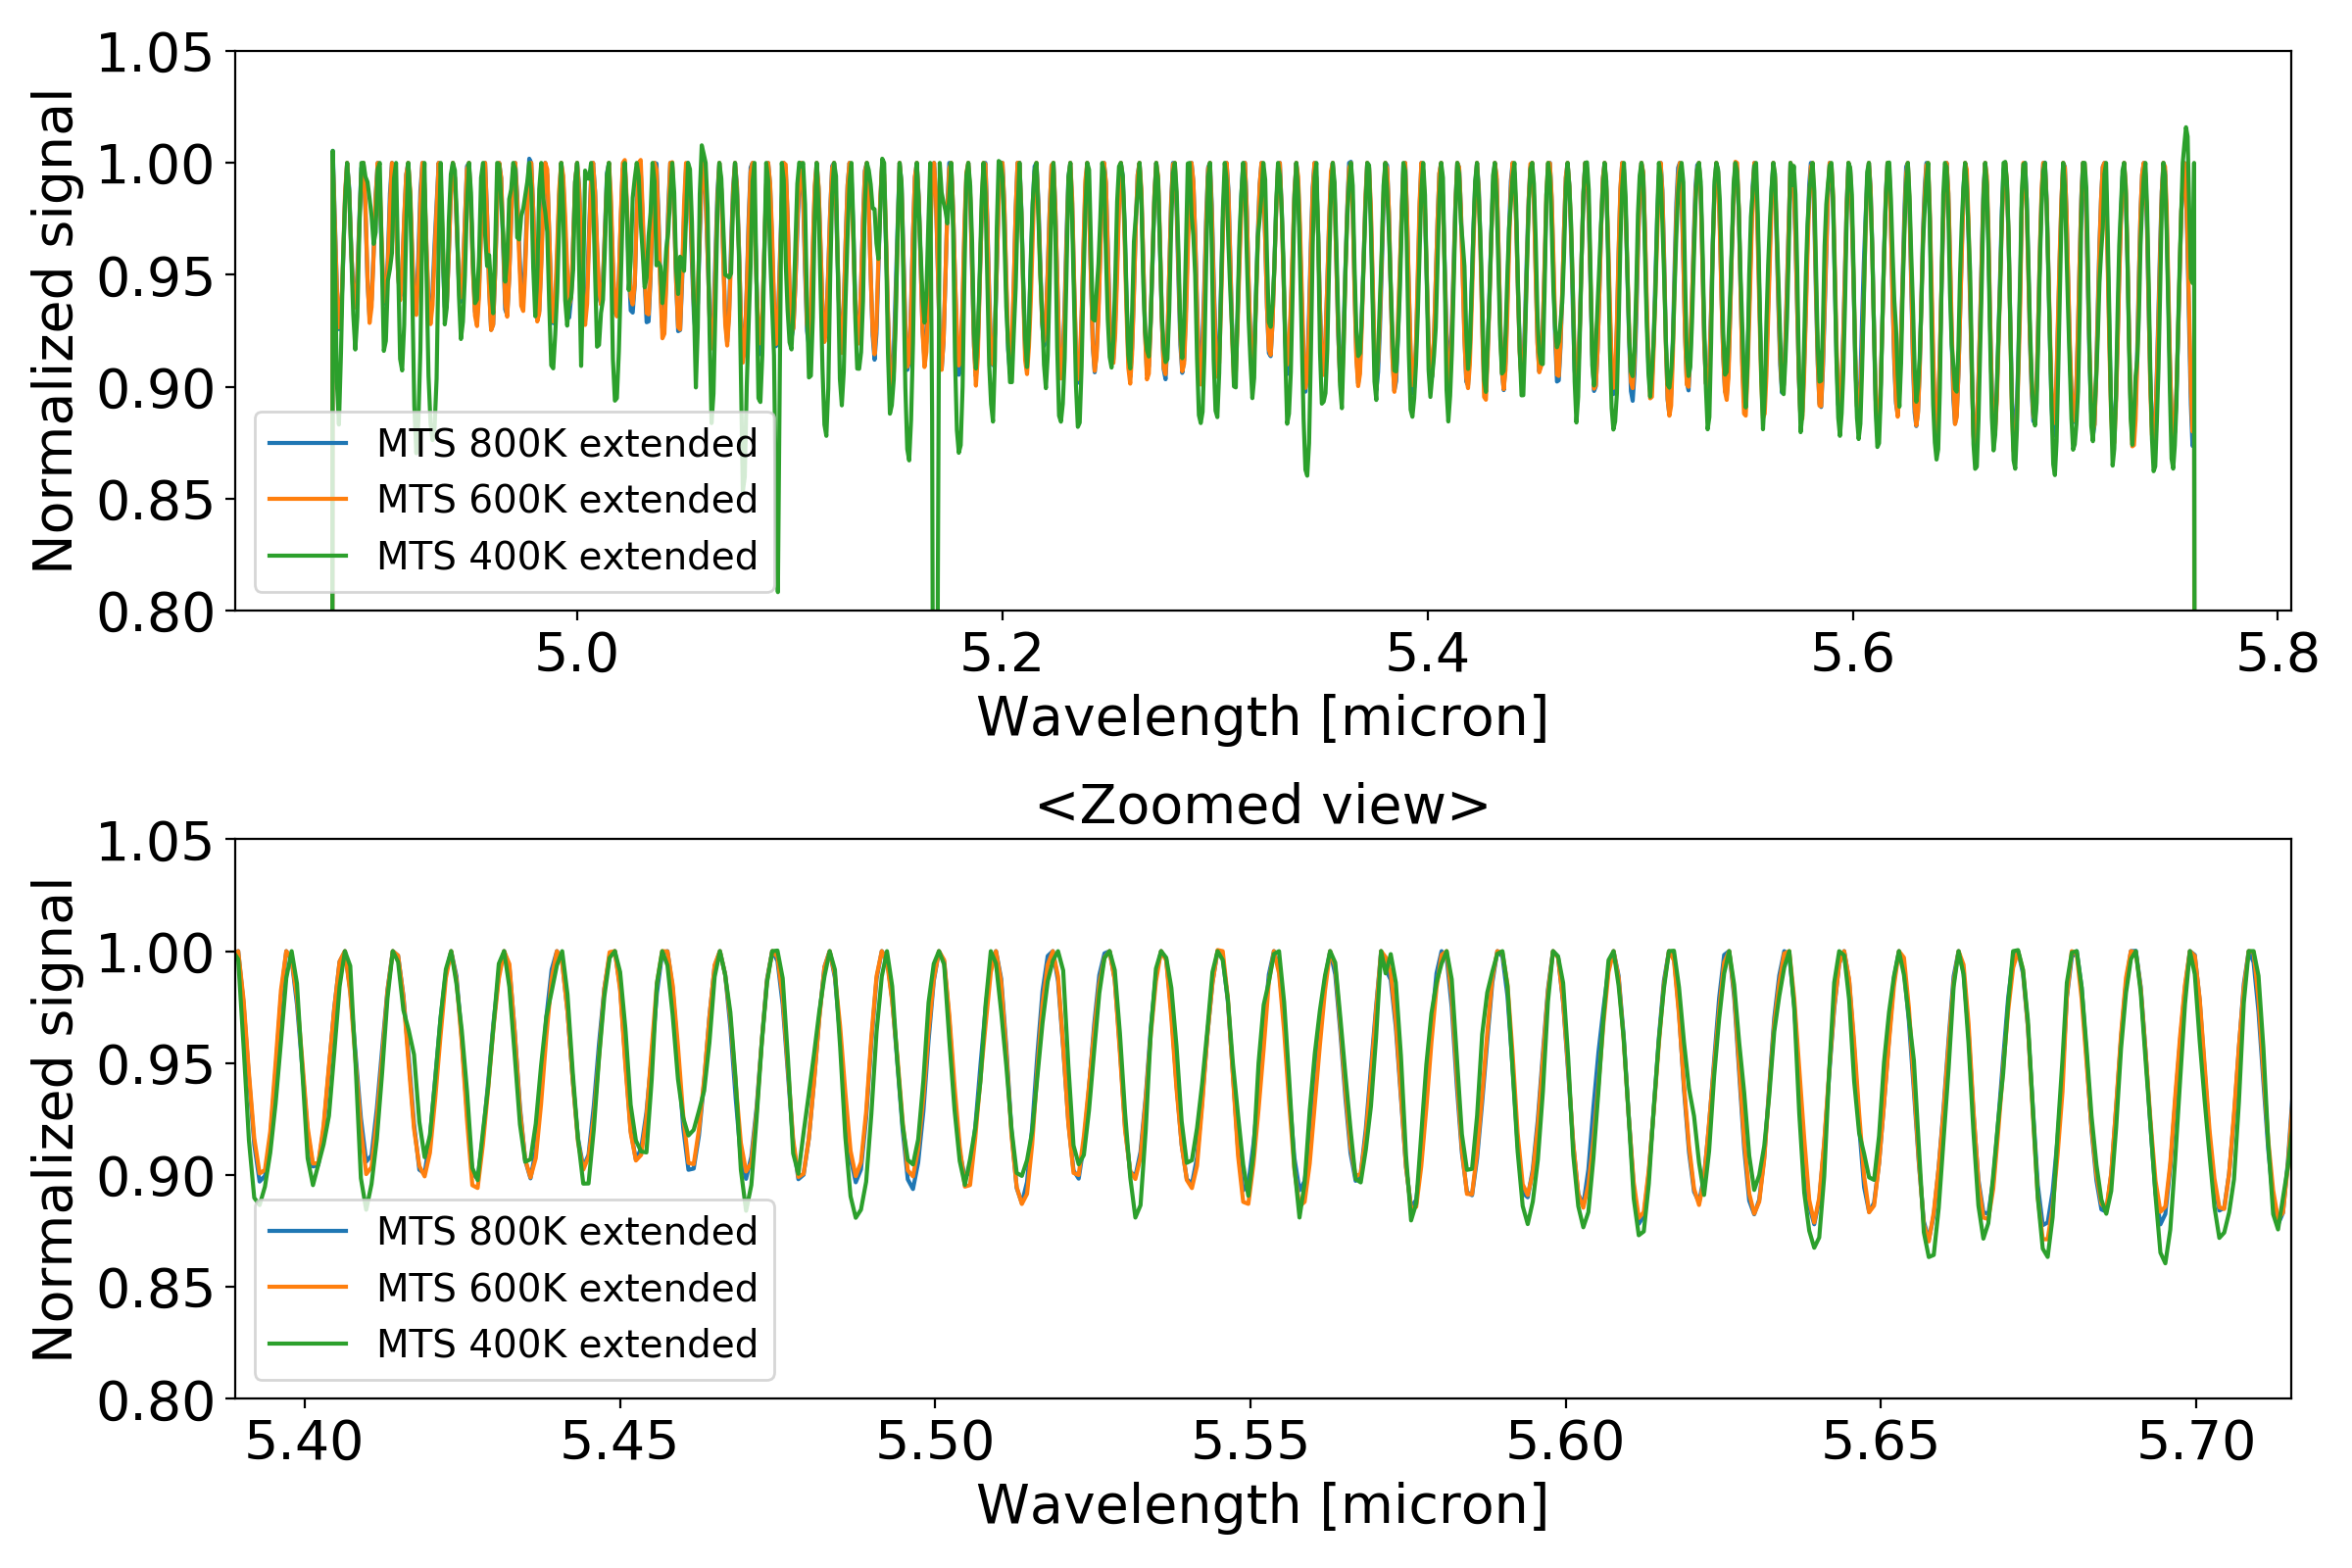

In [9]:
fig,axs = plt.subplots(3,1,figsize=(12,13))
axs[0].set_title('MTS 800K extended source')
axs[0].plot(lambdaMap[ypos,xpos][sel],ext_800Ksource_norm[0])
axs[0].plot(lambdaMap[ypos,xpos][sel][ext_800Ksource_norm[1]],ext_800Ksource_norm[0][ext_800Ksource_norm[1]],'ro')
axs[0].plot(lambdaMap[ypos,xpos][sel],ext_800Ksource_norm[2],'orange')
axs[0].set_ylim(20,35)
axs[1].set_title('MTS 600K extended source')
axs[1].plot(lambdaMap[ypos,xpos][sel],ext_600Ksource_norm[0])
axs[1].plot(lambdaMap[ypos,xpos][sel][ext_600Ksource_norm[1]],ext_600Ksource_norm[0][ext_600Ksource_norm[1]],'ro')
axs[1].plot(lambdaMap[ypos,xpos][sel],ext_600Ksource_norm[2],'orange')
axs[1].set_ylim(7,10)
axs[2].set_title('MTS 400K extended source')
axs[2].plot(lambdaMap[ypos,xpos][sel],ext_400Ksource_norm[0])
axs[2].plot(lambdaMap[ypos,xpos][sel][ext_400Ksource_norm[1]],ext_400Ksource_norm[0][ext_400Ksource_norm[1]],'ro')
axs[2].plot(lambdaMap[ypos,xpos][sel],ext_400Ksource_norm[2],'orange')
axs[2].set_ylim(0.5,1.2)
for plot in range(3): 
    axs[plot].set_xlabel('Wavelength [micron]')
    axs[plot].set_ylabel('Signal [DN/sec]')
plt.tight_layout()

fig,axs = plt.subplots(2,1,figsize=(12,8))
for plot in range(2):
    axs[plot].plot(lambdaMap[ypos,xpos][sel],ext_800Ksource_norm[0]/ext_800Ksource_norm[2],label='MTS 800K extended')
    axs[plot].plot(lambdaMap[ypos,xpos][sel],ext_600Ksource_norm[0]/ext_600Ksource_norm[2],label='MTS 600K extended')
    axs[plot].plot(lambdaMap[ypos,xpos][sel],ext_400Ksource_norm[0]/ext_400Ksource_norm[2],label='MTS 400K extended')
    axs[plot].set_ylim(0.8,1.05)
    axs[plot].set_xlabel('Wavelength [micron]')
    axs[plot].set_ylabel('Normalized signal')
    axs[plot].legend()
axs[1].set_xlim(5.389,5.715)
axs[1].set_title('<Zoomed view>')
plt.tight_layout()

### Remarks:
* The fringe transmission of the MTS 800K and 600K extended source match in frequency and amplitude.
* The fringe transmission of the MTS 400K extended source shows a more erratic behavior, however the erratic behavior also manifests in regions of low signals. At longer than 5.2um the fringe transmission matches that of the MTS 800K and 600K extended source fringes.

## Conclusions:  
We find that the fringe transmissions of the three blackbody observations match in frequency and amplitude, despite the different absolute signal levels. This was just a sanity check (literally). The fringe transmission should **not** change with different radiance levels, given that it is a transmission (multiplicative factor) introduced by the detector. The fringe transmission does change however with different illumination patterns.
  
## Follow-up question:  
How can we quantitatively describe the effect of any one source illumination on the fringe transmission?